In [1]:
# Library
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_excel(r'C:\Users\mdimt\Downloads\dataset-csv file\practice_dataset-main\Online_retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## 1. Based on your understanding of the data, what kind of business is this company in?

In [3]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [4]:
df['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [5]:
len(df.Country.unique())

38

## 2. Analyze the sales performance of this company, and provide your insights regarding the same.

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
TotalAmount = df['Quantity'] * df['UnitPrice']
TotalAmount

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Length: 541909, dtype: float64

In [8]:
df['TotalAmount'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
# add column to a specific position in dataset
# TotalAmount = df['Quantity'] * df['UnitPrice']
# df.insert(loc=5, column='TotalAmount', value=TotalAmount)
# df

In [10]:
new_df = df[['CustomerID', 'InvoiceNo', 'StockCode', 'Quantity', 'TotalAmount', 'InvoiceDate', 'Country']]
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom


In [11]:
country_price = new_df.groupby('Country')['Quantity'].sum().sort_values(ascending=False)
country_price

Country
United Kingdom          4263829
Netherlands              200128
EIRE                     142637
Germany                  117448
France                   110480
Australia                 83653
Sweden                    35637
Switzerland               30325
Spain                     26824
Japan                     25218
Belgium                   23152
Norway                    19247
Portugal                  16180
Finland                   10666
Channel Islands            9479
Denmark                    8188
Italy                      7999
Cyprus                     6317
Singapore                  5234
Austria                    4827
Hong Kong                  4769
Israel                     4353
Poland                     3653
Unspecified                3300
Canada                     2763
Iceland                    2458
Greece                     1556
USA                        1034
United Arab Emirates        982
Malta                       944
Lithuania                   652


In [12]:
# top 5 countries with maximum purchases
country_price[:5]

Country
United Kingdom    4263829
Netherlands        200128
EIRE               142637
Germany            117448
France             110480
Name: Quantity, dtype: int64

<AxesSubplot:xlabel='Country'>

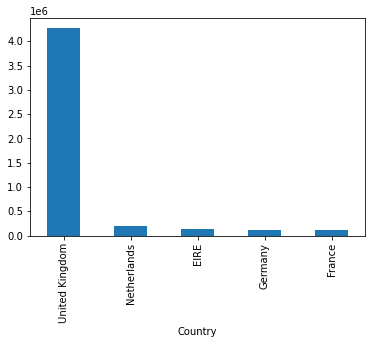

In [13]:
# Let's visualize
country_price[:5].plot(kind = 'bar')

<AxesSubplot:xlabel='Country'>

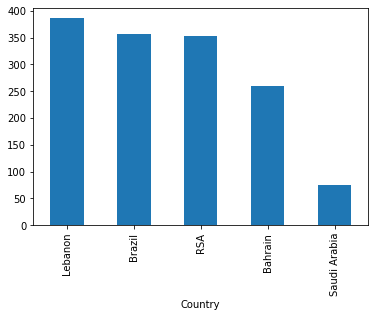

In [14]:
# Least 5 countries with number of purchases 
country_price[-5:].plot(kind = 'bar')

In [15]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom


In [16]:
# add  new feature or column as year and extract year value from invoiceDate
new_df['year'] = new_df['InvoiceDate'].dt.year
new_df.head()

<ipython-input-16-5cb96d6e747a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['year'] = new_df['InvoiceDate'].dt.year


,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,year
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2010
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,2010
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2010
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,2010
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,2010


<AxesSubplot:xlabel='year'>

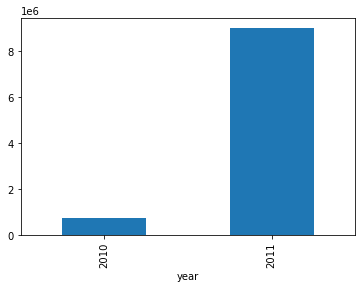

In [17]:
#total sales for different year
new_df.groupby('year')['TotalAmount'].sum().plot(kind='bar')

In [18]:
new_df['Mon'] = new_df['InvoiceDate'].dt.month
new_df['month'] = new_df['InvoiceDate'].dt.month_name()
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,year,Mon,month
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2010,12,December
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2010,12,December
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December


<AxesSubplot:xlabel='Mon,year'>

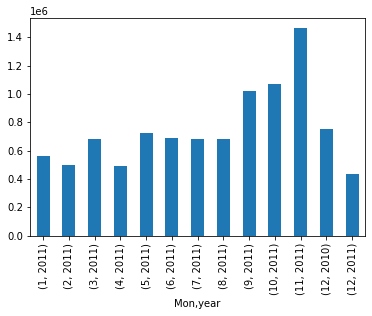

In [19]:
new_df.groupby(['Mon', 'year'])['TotalAmount'].sum().plot(kind='bar')

In [ ]:
Ans: max no of sales is in november month we see thatfor 2010 there only december month data but for 2011 we have all months data.
    we observed from sep to nov we had good sales

## 3. Based on your analysis of the data, what are the potential area of improvement for the business?

In [21]:
new_df.head()

,CustomerID,InvoiceNo,StockCode,Quantity,TotalAmount,InvoiceDate,Country,year,Mon,month
0,17850.0,536365,85123A,6,15.30,2010-12-01 08:26:00,United Kingdom,2010,12,December
1,17850.0,536365,71053,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
2,17850.0,536365,84406B,8,22.00,2010-12-01 08:26:00,United Kingdom,2010,12,December
3,17850.0,536365,84029G,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December
4,17850.0,536365,84029E,6,20.34,2010-12-01 08:26:00,United Kingdom,2010,12,December


In [22]:
# Check missing records
new_df.isnull().sum()

CustomerID     135080
InvoiceNo           0
StockCode           0
Quantity            0
TotalAmount         0
InvoiceDate         0
Country             0
year                0
Mon                 0
month               0
dtype: int64

In [23]:
# drop missing records 
new_df = new_df.dropna()

In [24]:
# cross check missing records 
new_df.isnull().sum()

CustomerID     0
InvoiceNo      0
StockCode      0
Quantity       0
TotalAmount    0
InvoiceDate    0
Country        0
year           0
Mon            0
month          0
dtype: int64

In [26]:
# find countries with more customers 
cust_id = pd.DataFrame(new_df.groupby('Country')['CustomerID'].count().sort_values(ascending=False))
cust_id

,CustomerID
Country,
United Kingdom,361878
Germany,9495
France,8491
EIRE,7485
Spain,2533
Netherlands,2371
Belgium,2069
Switzerland,1877
Portugal,1480


<AxesSubplot:title={'center':'Max customer for country'}, xlabel='Country'>

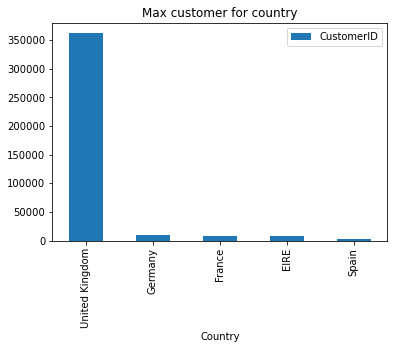

In [28]:
cust_id[:5].plot(kind='bar', title='Max customer for country')

<AxesSubplot:title={'center':'Least customer for country'}, xlabel='Country'>

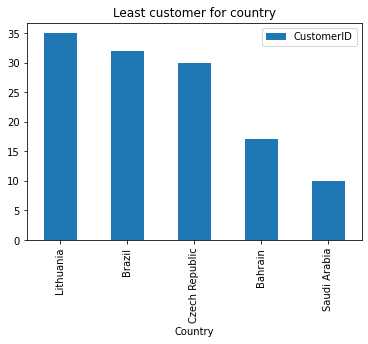

In [30]:
cust_id[-5:].plot(kind='bar', title='Least customer for country')

In [ ]:
we see that sep to dec we had high sales and we can concentrate to improve other remaining months.
we can more focus towards the country wiinth least no of customers to increase no of customer for sales point of view

## 4. what are the additional business problems that can be analyzed using this data. support with explanation.

In [31]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [32]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalAmount         0
dtype: int64

In [34]:
df = df.dropna()

In [35]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalAmount    0
dtype: int64

In [39]:
#sales average of each product
average_sales = df.groupby(['StockCode', 'Description'])['Quantity', 'TotalAmount'].mean().sort_values(by = 'Quantity', ascending=False)
average_sales

<ipython-input-39-4ffe1de81483>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  average_sales = df.groupby(['StockCode', 'Description'])['Quantity', 'TotalAmount'].mean().sort_values(by = 'Quantity', ascending=False)


,,Quantity,TotalAmount
StockCode,Description,,
47556B,TEA TIME TEA TOWELS,1300.000000,3022.500000
84568,GIRLS ALPHABET IRON ON PATCHES,520.000000,97.200000
84826,ASSTD DESIGN 3D PAPER STICKERS,368.702703,9.145405
18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,325.333333,21.320000
20914,SET/5 RED SPOTTY LID GLASS BOWLS,288.000000,734.400000
...,...,...,...
21412,VINTAGE GOLD TINSEL REEL,-6.000000,-2.520000
79323W,WHITE CHERRY LIGHTS,-8.000000,-54.000000
21144,PINK POODLE HANGING DECORATION,-12.000000,-4.560000


In [ ]:
we can see that sep to dec we had high sales and  remaining months not performance better so we focus in this
and better way to attract monthly offer on for fulfill requirement so reamining month improve for sales
we can more focus towards the country wiinth least no of customers to increase no of customer for sales point of view